# Examen A Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

In [113]:
import sympy as sp

In [111]:
import numpy as np

---
# Primer punto. Optimización de funciones con `SymPy` (37 puntos)

**Costo mínimo**. Imagine dos contenedores cilíndricos sin tapa que deben satisfacer las siguientes condiciones:

- El primer contenedor tiene el doble de altura que el segundo.
- La altura del primer contenedor (el de mayor tamaño) es el doble de su radio.
- El material para la base cuesta 10.00 MXN por cada $m^2$.
- El material para los lados cuesta 6.00 MXN por cada $m^2$.

¿Cuál es el costo del contenedor más barato?


**Desde las funciones esta mal, y fue lo único que medio pude hacer**

1. Escriba el volumen $V_1(r_1)$ y $V_2(r_2, r_1)$ de ambos contenedores como dos funciones distintas, donde $r_1$ es el radio del primer contenedor y $r_2$ es el radio del segundo. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

$V_1(𝜋2r_1^3)$

$V_2(𝜋 r_2^3)$

2. Escriba el costo **C** de fabricar ambos contenedores como una función de los radios de las bases. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

$C_1 = (10*𝜋*r_1^2) + (6*2*𝜋*r_1*2*r_1) = (10*𝜋*r_1^2)+ (24*𝜋*r_1^2)$

$C_2 = (10*𝜋*r_2^2) + (6*2*𝜋*r_2*r_1) = (10*𝜋*r_2^2) + (12*𝜋*r_1*r_2)$

$C_t = (10*𝜋*r_1^2) + (24*𝜋*r_1^2) + (10*𝜋*r_2^2)+ (12*𝜋*r_1*r_2)$

$ = 10*((𝜋*r_1^2) + (𝜋*r_2^2)) + 6 * ((4*𝜋*r_1^2) + (2*𝜋*r_1*r_2)$

3. Determina las dimensiones de los contenedores si el volumen del contenedor pequeño debe ser de $12m^3$ y el costo debe ser mínimo.

In [129]:
sp.var("x")
sp.var("y")

V_2 = sp.pi * y**2 * x -12
dim = sp.solve(V_2, x)[0]
dim

12/(pi*y**2)

In [82]:
Pt = 10 * ((sp.pi*x**2) + (sp.pi*y**2)) + 6*((4*sp.pi*x**2) + (2*sp.pi*x*y))

pup = Pt.subs(x, dim)
pup

10*pi*y**2 + 144/y + 4896/(pi*y**4)

In [86]:
def Pt(y):
    return (10*sp.pi*y**2) + (144/y) + (4896/(sp.pi*y**4))

dut = sp.diff(Pt(y),y)
pc = sp.solve(dut, y)
pc

[-5**(2/3)*(-18 + 6*sqrt(689))**(1/3)/(5*pi**(1/3)),
 5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(5*pi**(1/3)),
 5**(2/3)*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) - sqrt(3)*5**(2/3)*I*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)),
 5**(2/3)*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) + sqrt(3)*5**(2/3)*I*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)),
 -5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) - sqrt(3)*5**(2/3)*I*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)),
 -5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) + sqrt(3)*5**(2/3)*I*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3))]

In [87]:
ddut = sp.diff(dut,y)
ddut

20*pi + 288/y**3 + 97920/(pi*y**6)

In [89]:
d2_deriv = ddut.subs(y,pc[1])

if d2_deriv < 0:
    print("El punto crítico se encuentra en " + str(pc[1]) + " y es un máximo")
elif d2_deriv > 0:
    print("El punto crítico se encuentra en " + str(pc[1]) + " y es un mínimo")
else:
    print("El punto crítico se encuentra en " + str(pc[1]) + " y no se puede definir por el criterio de la segunda derivada si es un máximo o mínimo")

El punto crítico se encuentra en 5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(5*pi**(1/3)) y es un mínimo


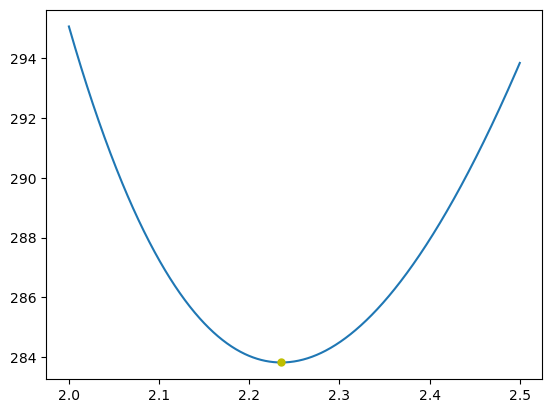

In [98]:
j = np.linspace(2, 2.5, 1000)

plt.figure()
plt.plot(j,Pt(j))
plt.plot(pc[1], Pt(pc[1]), ".y", ms=10)

In [130]:
fy = pc[1]

fx = dim.subs(y, fy)
print("La medida de r2 es: ", float(fy))

print("La medida de r1 es: ", float(dim.subs(y, fy)))



La medida de r2 es:  2.235526671726874
La medida de r1 es:  0.7643137311179903


3. ¿Cuál fue el costo de fabricar este par de contenedores?

In [123]:
print("El costo de fabricar ambos contenedores es de: " + str(float(Pt(fy))))

El costo de fabricar ambos contenedores es de: 283.8161489938861


---
# Segundo punto. Programación lineal (37 puntos)

Una empresa se dedica a fabricar tarjetas de control para automóviles, y están en su momento de planeación de compras anuales. Hay 5 proveedores que pueden proveer los componentes, cada uno a su propio precio.

<table>
  <tr>
      <th>  </th>
      <th>Proveedor 1</th>
      <th>Proveedor 2</th>
      <th>Proveedor 3</th>
      <th>Demanda</th>
  </tr>
  <tr>
      <th>Componente 1</th>
      <td>0.5</td>
      <td>0.6</td>
      <td>0.7</td>
      <td>15000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 2</th>
      <td>0.7</td>
      <td>0.5</td>
      <td>0.6</td>
      <td>20000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 3</th>
      <td>0.32</td>
      <td>0.54</td>
      <td>0.8</td>
      <td>12000</td>
  </tr>

  <tr style="border-bottom: 1px solid #000;">
      <th>Capacidad</th>
      <td> 21000 </td>
      <td> 16000 </td>
      <td> 16000 </td>
      <td>  </td>
  </tr>
</table>

El proveedor tiene restricciones de capacidad de fabricación del tipo de componentes, por lo que un proveedor no puede satisfacer nuestra demanda completa para cada componente.

Se desea conocer la cantidad que se debe comprar de cada componente a cada proveedor para gastar la menor cantidad de dinero posible, pero al mismo tiempo lograr satisfacer la demanda para poder continuar con la manufactura del producto.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}

Lo que arregle de esta parte fueron las restricciones, ya que en un principio había puesto lo de provedores como igualdad y la desigualdad era la demanda cuando tenía que ser al revés

#### MINIMIZAR 

#### FUNCION
$$ 0.5 xc1p1 + 0.6 xc1p2 + 0.7 xc1p3 + 0.7 xc2p1 + 0.5 xc2p2 + 0.6 xc2p3 + 0.32 xc3p1 + 0.54 xc3p2 + 0.8 xc3p3 $$

#### RESTRICCIONES  
$$ xc1p1 + 0.6 xc1p2 + 0.7 xc1p3 = 15000 $$
$$ 0.7 xc2p1 + 0.5 xc2p2 + 0.6 xc2p3 = 20000 $$
$$ 0.32 xc3p1 + 0.54 xc3p2 + 0.8 xc3p3 = 12000$$

#### SEGUNDAS RESTRICCIONES 
$$ 0.5 xc1p1 + 0.7 xc2p1 + 0.32 xc3p1  <= 21000 $$
$$ 0.6 xc1p2 + 0.5 xc2p2 + 0.54 xc3p2  <= 16000 $$
$$ 0.7 xc1p3 + 0.6 xc2p3 + 0.8 xc3p3  <= 16000 $$

2. Resuelva el problema utilizando la función `linprog`. ¿Cómo debe ser la distribución de compras? ¿Cuánto dinero se necesita para satisfacer la demanda? (10 puntos)

In [3]:
import numpy as np
import scipy.optimize as opt

c = ([0.5,
      0.6,
      0.7,
      0.7,
      0.5,
      0.6,
      0.32,
      0.54,
      0.8
     ])

Aub = np.array([
    [1, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 1]
])
   

bub = np.array([21000,
                16000,
                16000])

Aeq = np.array([
    [1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0,1, 1, 1]

])
 

beq = np.array ([15000,
                 20000,
                 12000])

sol = opt.linprog (c, Aub, bub, Aeq, beq)
sol

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 22940.0
              x: [ 9.000e+03  0.000e+00  6.000e+03  0.000e+00  1.600e+04
                   4.000e+03  1.200e+04  0.000e+00  0.000e+00]
            nit: 6
          lower:  residual: [ 9.000e+03  0.000e+00  6.000e+03  0.000e+00
                              1.600e+04  4.000e+03  1.200e+04  0.000e+00
                              0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  3.000e-01
                              0.000e+00  0.000e+00  0.000e+00  1.200e-01
                              2.800e-01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0

In [6]:
sol.x

array([ 9000.,     0.,  6000.,     0., 16000.,  4000., 12000.,     0.,
           0.])

Componente 1: 9,000 del primer provedor y 6,000 del tercer provedor

Componente 2: 16,000 del segundo provedor y 4,000 del tercer provedor

Componente 3: 12,000 del primer provedor 

Total del dinero gastado es: 22940

In [7]:
Aub @ sol.x

array([21000., 16000., 10000.])

# Tercer punto. Ajuste de curvas (36 puntos)

Utiliza el archivo adjunto en Canvas en el apartado que corresponde al examen.

Escribe tu número de expediente: 745624

Lee el archivo y extrae la siguiente información:
- $x$ es la primer columna del archivo
- $y$ es la columna correspondiente a los últimos dos dígitos de tu número de expediente + 1. E.g. mi expediente es $693871$; por lo tanto, debo usar la columna $72$.

**Aquí arregle el hecho de que use los primeros dígitos de mi expediente en vez de los últimos**

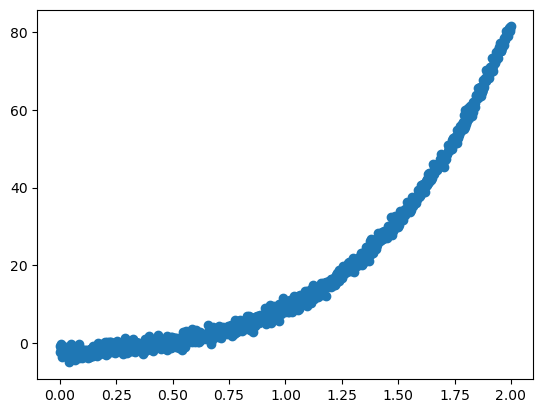

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.array(data[0]) 
y = np.array(data[25])

plt.figure()
plt.scatter(x, y)

In [54]:
import pandas as pd
import scipy.optimize as opt

data = pd.read_excel("E01-RegresionLineal.xlsx")
data

x = np.array(data[0]) 
y = np.array(data[25])

# y = b0 + b1*x
m = len(y)
beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(y, [m, 1])

# y = b0 + b1*x + b2*x**2 + b3*x**3
beta4 = np.random.rand(4)
x2_factor = np.reshape(x**2, [m, 1])
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )

# y = b0 + b1*x + b2*x**2 + b*x**3 + b*x**4 + b*x**5
beta6 = np.random.rand(6)
x4_factor = np.reshape(x**4, [m, 1])
x5_factor = np.reshape(x**5, [m, 1])
X5 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor, x5_factor) )


def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

In [55]:
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))
sol2 = opt.minimize(funcion_de_costo, beta4, args=(X3, y_vector))
sol3 = opt.minimize(funcion_de_costo, beta6, args=(X5, y_vector))

In [56]:
sol1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 88104.13153847109
        x: [-1.761e+01  3.646e+01]
      nit: 7
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 1.535e-03 -1.535e-03]
            [-1.535e-03  2.035e-03]]
     nfev: 45
     njev: 15

In [57]:
sol2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1035.5573137432405
        x: [-3.193e+00  1.060e+01 -1.323e+01  1.453e+01]
      nit: 9
      jac: [ 1.526e-05  3.052e-05  3.052e-05  4.578e-05]
 hess_inv: [[ 4.904e-03 -1.304e-02  9.851e-03 -2.257e-03]
            [-1.304e-02  5.712e-02 -5.847e-02  1.697e-02]
            [ 9.851e-03 -5.847e-02  7.160e-02 -2.345e-02]
            [-2.257e-03  1.697e-02 -2.345e-02  8.288e-03]]
     nfev: 331
     njev: 64

In [58]:
sol3

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 964.2161619725156
        x: [-2.376e+00  2.277e+00  5.980e+00 -1.120e+00  4.438e+00
            -1.896e-01]
      nit: 22
      jac: [-1.144e-04  0.000e+00 -1.602e-04 -3.891e-04 -7.858e-04
            -1.335e-03]
 hess_inv: [[ 6.205e-03 -1.001e-02 ... -7.933e-03  2.741e-04]
            [-1.001e-02  2.375e-02 ...  1.812e-03  3.235e-03]
            ...
            [-7.933e-03  1.812e-03 ...  9.888e-02 -2.018e-02]
            [ 2.741e-04  3.235e-03 ... -2.018e-02  4.833e-03]]
     nfev: 354
     njev: 49

1. Ajuste los datos con polinomios de grados 1, 3, y 5. Muestre los errores de forma gráfica. ¿Qué polinomio se ajusta mejor?

In [59]:
def f1(x) :
    return -1.761e+01 + 3.646e+01*x
def f3(x):
    return -3.193e+00 + 1.060e+01*x - 1.323e+01*x**2 + 1.453e+01*x**3
def f5(x):
    return -2.376e+00 + 2.277e+00*x + 5.980e+00*x**2 - 1.120e+00*x**3 + 4.438e+00*x**4 - 1.896e-01*x**5

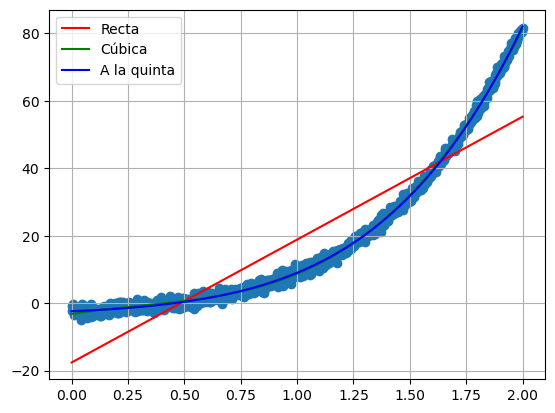

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array(data[0]) 
y = np.array(data[25])

plt.figure()
plt.scatter(x, y)
plt.plot(x, f1(x),"r", label= "Recta")
plt.plot(x, f3(x),"g", label= "Cúbica")
plt.plot(x, f5(x),"b", label= "A la quinta")
plt.legend(loc= "best")
plt.grid()

<BarContainer object of 3 artists>

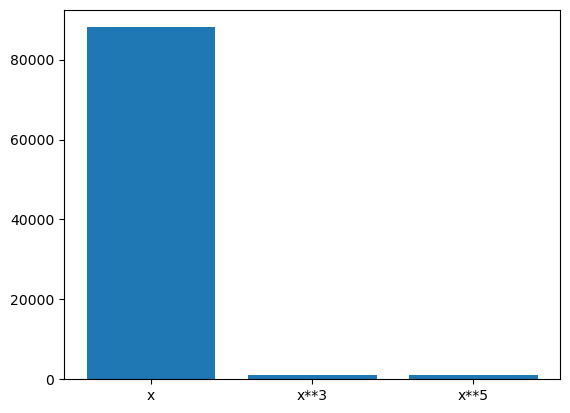

In [99]:
x = [1, 2, 3]
y = [sol1.fun, sol2.fun, sol3.fun]
etiquetas = ["x", "x**3", "x**5"]
fig, ax = plt.subplots()
ax.bar(x = x, height = y, tick_label = etiquetas)

2. Muestre en un gráfico los datos y el polinomio que mejor se ajuste.

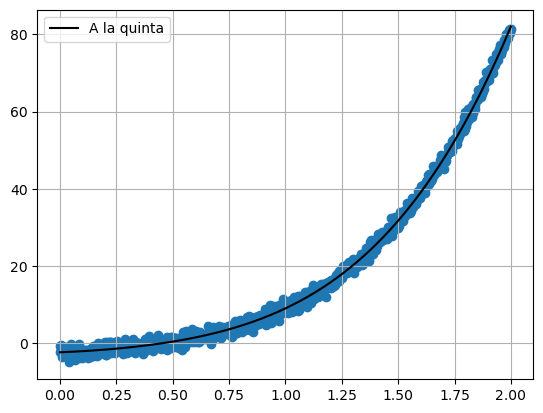

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array(data[0]) 
y = np.array(data[25])

plt.figure()
plt.scatter(x, y)

plt.plot(x, f5(x),"black", label= "A la quinta")
plt.legend(loc= "best")
plt.grid()

El polinomio que mejor se ajusta a los datos es el de: A la quinta

**De aquí en adelante complete los ejercicios que me hacían falta**

3. Use el modelo para averiguar el valor de $y$ cuando:
- $x=0.001$
- $x=-0.1$
- $x=2.1$

In [65]:
s = 0.001
def g1(s) :
    return -1.761e+01 + 3.646e+01*s
def g3(s):
    return -3.193e+00 + 1.060e+01*s - 1.323e+01*s**2 + 1.453e+01*s**3
def g5(s):
    return -2.376e+00 + 2.277e+00*s + 5.980e+00*s**2 - 1.120e+00*s**3 + 4.438e+00*s**4 - 1.896e-01*s**5

In [66]:
g1(s)

-17.573539999999998

In [67]:
g3(s)

-3.18241321547

In [68]:
g5(s)

-2.3737170211155623

In [69]:
s = -0.1
def g1(s) :
    return -1.761e+01 + 3.646e+01*s
def g3(s):
    return -3.193e+00 + 1.060e+01*s - 1.323e+01*s**2 + 1.453e+01*s**3
def g5(s):
    return -2.376e+00 + 2.277e+00*s + 5.980e+00*s**2 - 1.120e+00*s**3 + 4.438e+00*s**4 - 1.896e-01*s**5

In [70]:
g1(s)

-21.256

In [71]:
g3(s)

-4.39983

In [72]:
g5(s)

-2.5423343039999997

In [73]:
s = 2.1
def g1(s) :
    return -1.761e+01 + 3.646e+01*s
def g3(s):
    return -3.193e+00 + 1.060e+01*s - 1.323e+01*s**2 + 1.453e+01*s**3
def g5(s):
    return -2.376e+00 + 2.277e+00*s + 5.980e+00*s**2 - 1.120e+00*s**3 + 4.438e+00*s**4 - 1.896e-01*s**5

In [74]:
g1(s)

58.956

In [75]:
g3(s)

95.28503

In [76]:
g5(s)

96.97239230400001

4. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación?

El modelo en ambos casos resulta ser coherente, ya que cuando x = -0.1, el resultado arrojado si entra dentro del promedio. lo mismo ocurre cuando x = 2.1

5. Agregue un factor $\cos{(10x)}$ a su modelo y grafique los resultados. ¿Mejoró el resultado?

In [77]:
def f1(x) :
    return -1.761e+01 + 3.646e+01*x
def f3(x):
    return -3.193e+00 + 1.060e+01*x - 1.323e+01*x**2 + 1.453e+01*x**3
def f5(x):
    return -2.376e+00 + 2.277e+00*x + 5.980e+00*x**2 - 1.120e+00*x**3 + 4.438e+00*x**4 - 1.896e-01*x**5
def f6(x):
    return -2.376e+00 + 2.277e+00*x + 5.980e+00*x**2 - 1.120e+00*x**3 + 4.438e+00*x**4 - 1.896e-01*x**5 + np.cos(10*x)

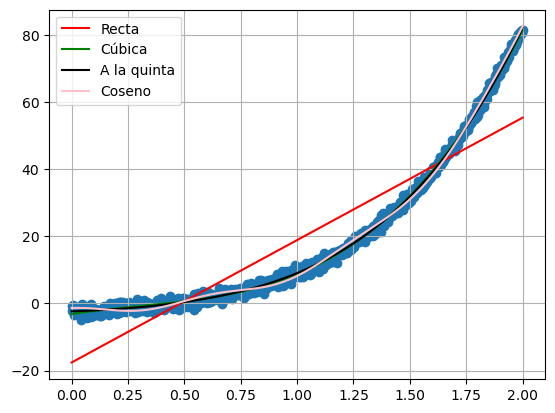

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array(data[0]) 
y = np.array(data[25])

plt.figure()
plt.scatter(x, y)
plt.plot(x, f1(x),"r", label= "Recta")
plt.plot(x, f3(x),"g", label= "Cúbica")
plt.plot(x, f5(x),"black", label= "A la quinta")
plt.plot(x, f6(x),"pink", label= "Coseno")
plt.legend(loc= "best")
plt.grid()

El resultado si mejoró se puede ver como el coseno si se logra ajustar a los datos